In [61]:
import numpy as np
import scipy as scp
import scipy.stats as ss
from scipy.integrate import quad
from functools import partial
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from datetime import date

def round_down(num, divisor):
    return num - (num%divisor)

In [100]:
now = datetime.today().strftime('%Y:%m:%d')
d1 = datetime.strptime(now, '%Y:%m:%d')
stk = yf.Ticker("AAPL")
expiry = stk.options[6]         #expiry date choice
opt = stk.option_chain(expiry)  #selecting that option based on expiry date                         
low = opt.calls.iloc[10]          #selecting specific call
low1 = opt.puts.iloc[10]          #selecting specific put
d2 = datetime.strptime(expiry, '%Y-%m-%d')
diff = (d2 - d1).days
close = stk.history(period="max")["Close"]

ans = []
for i in range(1, round_down(len(close),60), 60):
    #ans.append(open*(close[i+59]-close[i])/close[i])
    ans.append((close[i+59]-close[i])/close[i])

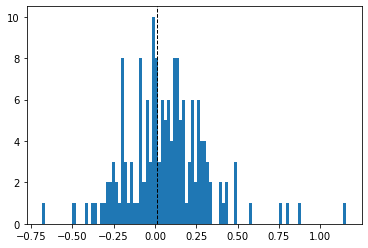

In [104]:
open = stk.info['open']
plt.hist(ans, 100)
strike = 400
gap = (strike-open)/open
plt.axvline(gap, color='k', linestyle='dashed', linewidth=1)

In [105]:
itm = []
for j in close:
    itm.append((j-strike)/open)
print(itm)

[-1.0091675926861299, -1.009243357914941, -1.0092938680674817, -1.0092686129912112, -1.009243357914941, -1.0091928477624004, -1.0091423376098596, -1.009091827457319, -1.0090413173047783, -1.008940296999697, -1.0089150419234267, -1.008940296999697, -1.0089908071522375, -1.0089655520759673, -1.0089908071522375, -1.0090413173047783, -1.009091827457319, -1.0091170825335893, -1.0090665723810486, -1.0090665723810486, -1.0091170825335893, -1.0091170825335893, -1.009091827457319, -1.009091827457319, -1.0090413173047783, -1.0090665723810486, -1.0090413173047783, -1.0090413173047783, -1.0090413173047783, -1.0090413173047783, -1.0090665723810486, -1.009091827457319, -1.0091423376098596, -1.0091928477624004, -1.009243357914941, -1.0092181028386706, -1.0091928477624004, -1.0091928477624004, -1.0091675926861299, -1.009243357914941, -1.009243357914941, -1.0092686129912112, -1.0092686129912112, -1.0092938680674817, -1.0092686129912112, -1.009243357914941, -1.0092938680674817, -1.0093443782200224, -1.0

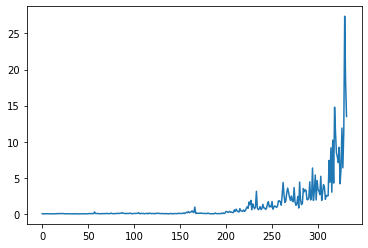

In [106]:
import statistics
k = 30
vol = []
for i in range(1, round_down(len(close),k), k):
    vol.append(statistics.stdev(close[i:i+(k-1)]))
    
plt.plot(vol)